# Import Dataset and Loading Data

In [51]:
#Import library pandas
import pandas as pd

#Import library numpy
import numpy as np

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Evaluation ML
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score

#me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings("ignore")

In [52]:
#Import dataset Crop_recomendation.csv
dataset="Crop_recommendation.csv"
crop=pd.read_csv(dataset)

# Exploratory Data Analysis

N - ratio of Nitrogen content in soil<br>
P - ratio of Phosphorous content in soil<br>
K - ratio of Potassium content in soil<br>
temperature - temperature in degree Celsius<br>
humidity - relative humidity in %<br>
ph - ph value of the soil<br>
rainfall - rainfall in mm

In [53]:
#Check head
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [54]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [55]:
#Describe data
crop.describe(include="all")

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [56]:
#Check data types
crop.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [57]:
#Hitung ukuran (jumlah baris dan kolom) dari dataset
print("Ukuran df: %d baris, %d kolom." % crop.shape)

Ukuran df: 2200 baris, 8 kolom.


In [102]:
crop['label'].nunique()

22

In [59]:
#Menghitung frekuensi pada kolom label dan melihat nilai unique
crop["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

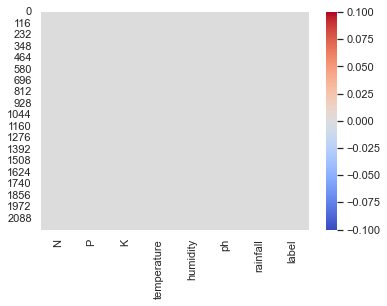

In [60]:
sns.heatmap(crop.isnull(),cmap="coolwarm")
plt.show()

<AxesSubplot:xlabel='ph', ylabel='Density'>

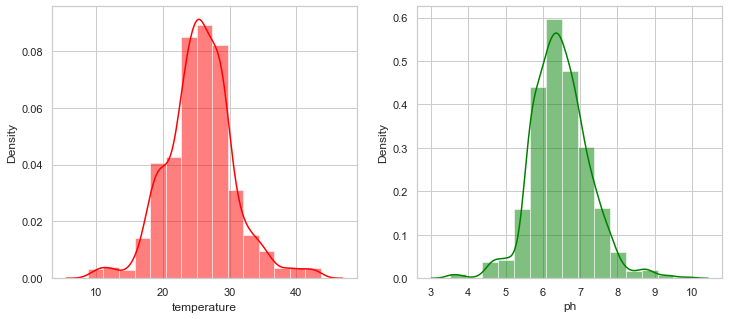

In [61]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(crop['temperature'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(crop['ph'],color="green",bins=15,hist_kws={'alpha':0.5})

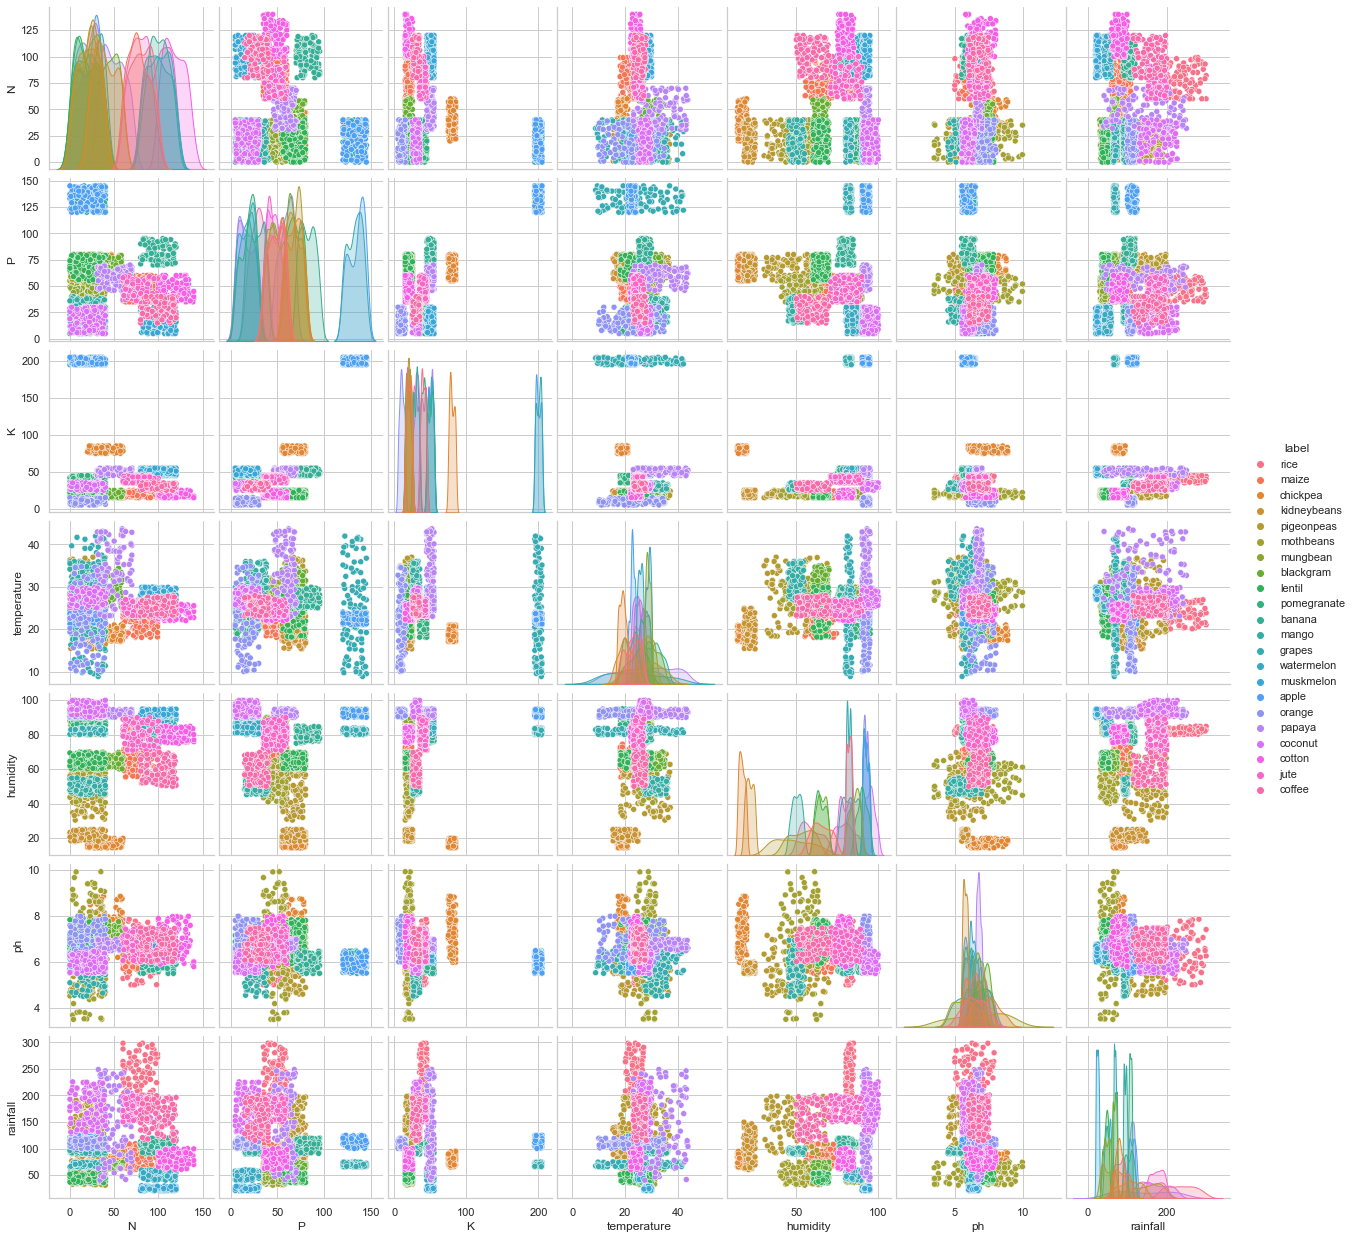

In [62]:
sns.pairplot(crop,hue = 'label')

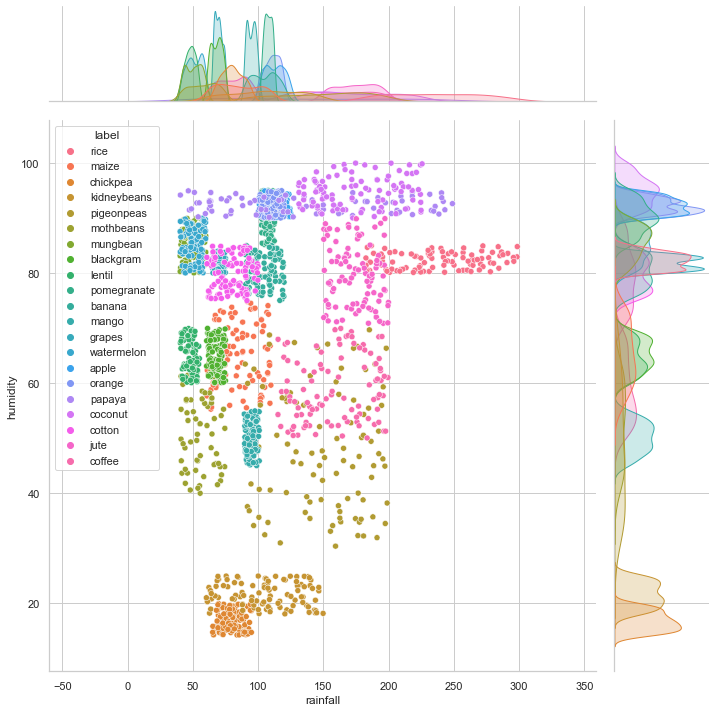

In [63]:
sns.jointplot(x="rainfall",y="humidity",data=crop[(crop['temperature']<40) & 
                                                  (crop['rainfall']>40)],height=10,hue="label")

<AxesSubplot:xlabel='label', ylabel='ph'>

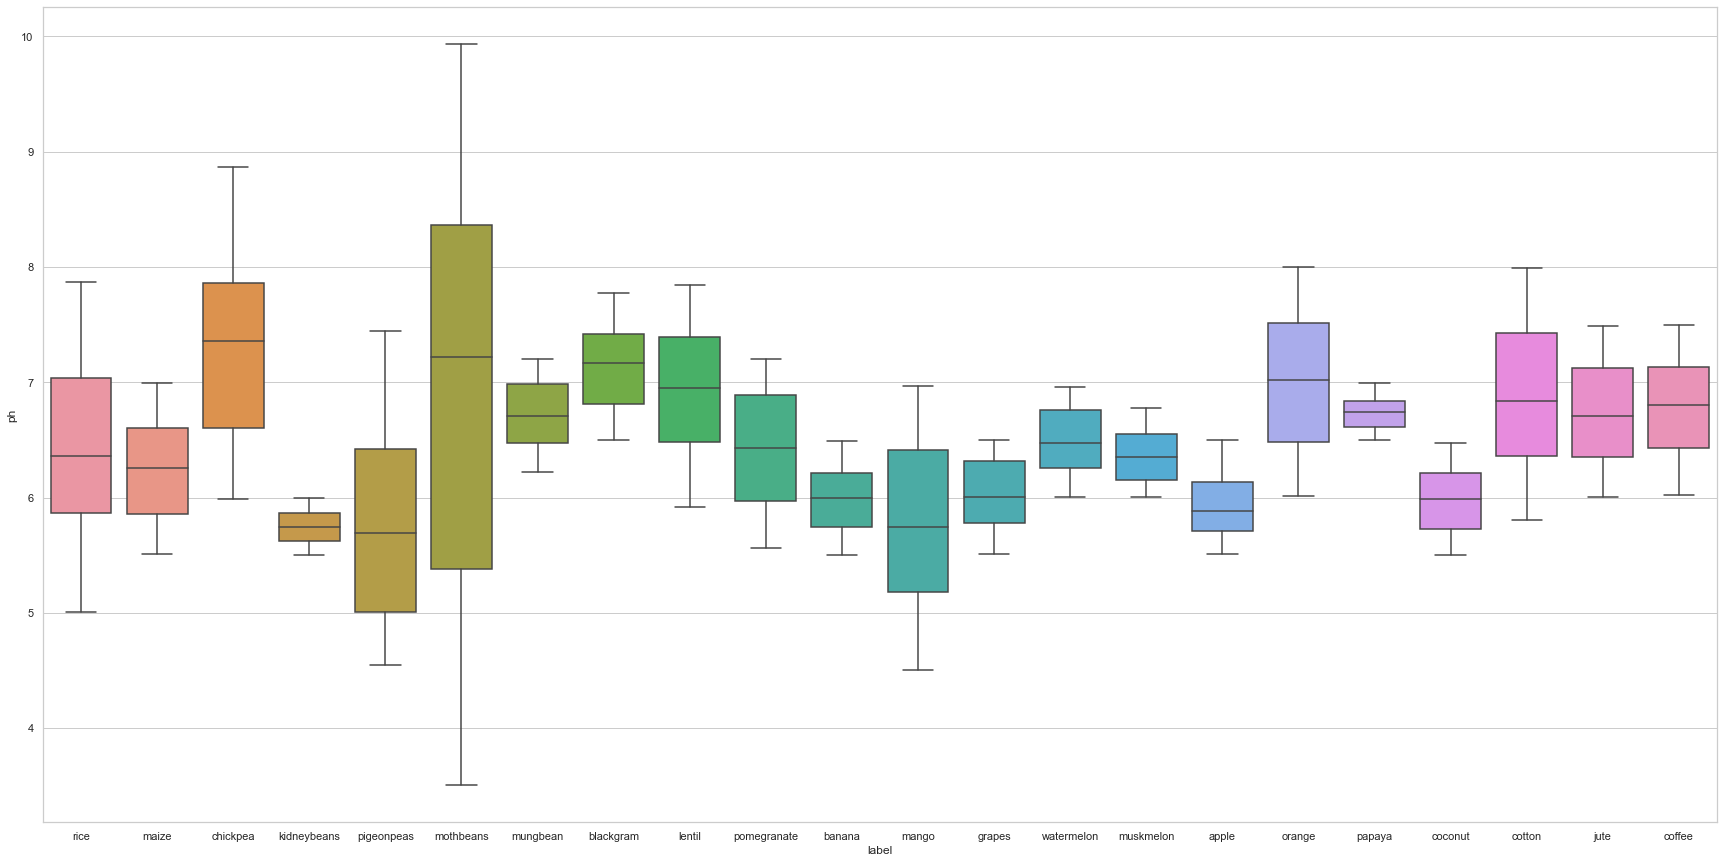

In [64]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='ph',data=crop)

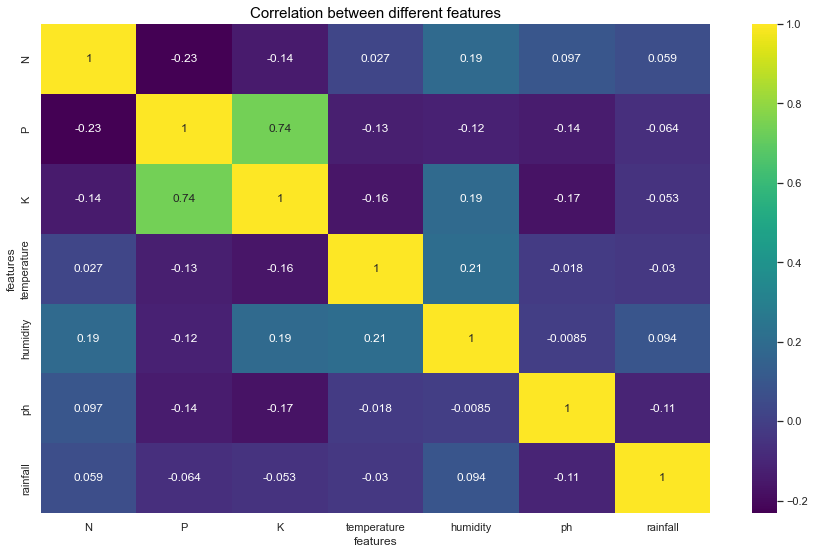

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [66]:
crop_summary = pd.pivot_table(crop,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [67]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='dodgerblue'
))

fig.update_layout(title="N-P-K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

# Feature Selection

In [68]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

In [69]:
acc = []
model = []

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

# Modeling Classification algorithms

## 1. K-Nearest Neighbors

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
   

In [72]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


In [73]:
#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  0.9886363636363636
knn_test_accuracy =  0.975


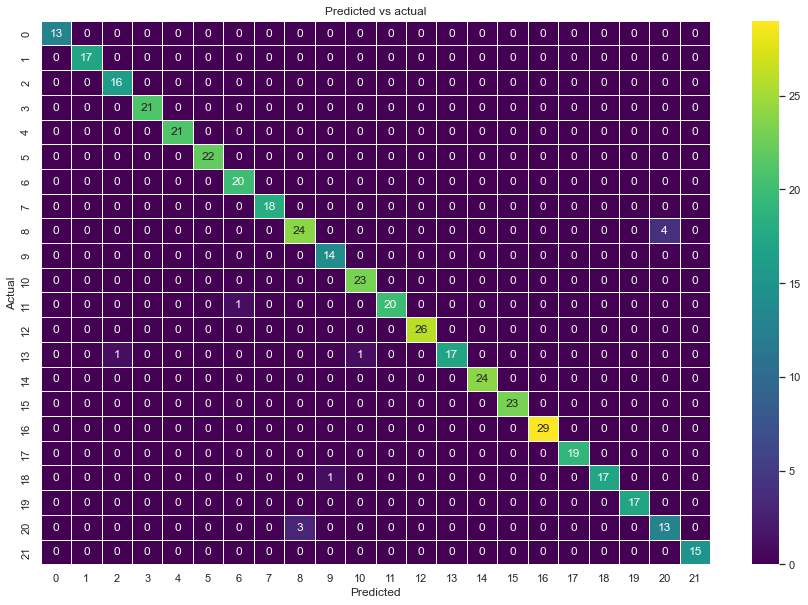

In [74]:
y_pred = knn.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

### Hyperparameter Tuning

One of the challenges in a KNN algorithm is finding the best 'k' i.e. the number of neighbors to be used in the majority vote while deciding the class. Generally, it is advisable to test the accuracy of your model for different values of k and then select the best one from them.

In [75]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.97045455, 0.96363636, 0.97045455, 0.96363636, 0.975     ,
       0.975     , 0.97727273, 0.96818182, 0.97272727, 0.97045455,
       0.97272727, 0.96818182, 0.96818182, 0.96818182, 0.97045455,
       0.97045455, 0.97045455, 0.97272727, 0.97272727, 0.97272727])

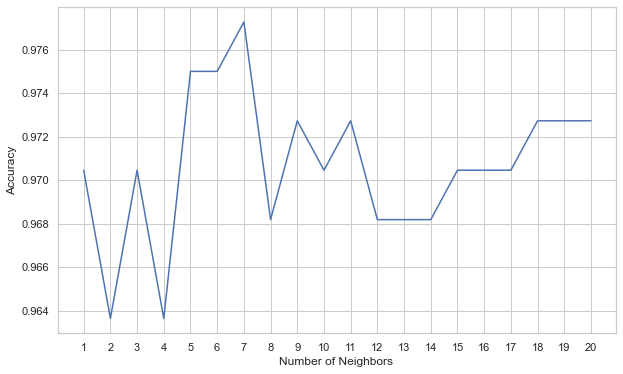

In [76]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

We will use three hyperparamters- n-neighbors, weights and metric:
* n_neighbors: Decide the best k based on the values we have computed earlier. * weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points. * metric: The distance metric to be used will calculating the similarity

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
grid_params = { 'n_neighbors' : [12,13,14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [79]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [80]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [81]:
g_res.best_score_

0.9789756440743992

In [82]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

In [83]:
# Using the best hyperparameters
knn_1 = KNeighborsClassifier(n_neighbors = 12, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn_1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=12,
                     weights='distance')

In [84]:
# Training & Testing accuracy after applying hyper parameter
knn_train_accuracy = knn_1.score(x_train,y_train)
print("knn_train_accuracy = ",knn_1.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn_1.score(x_test,y_test)
print("knn_test_accuracy = ",knn_1.score(x_test,y_test))

knn_train_accuracy =  1.0
knn_test_accuracy =  0.9727272727272728


## 2. Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [86]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


In [87]:
#Print Train Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Training accuracy =  0.8818181818181818
Testing accuracy =  0.9


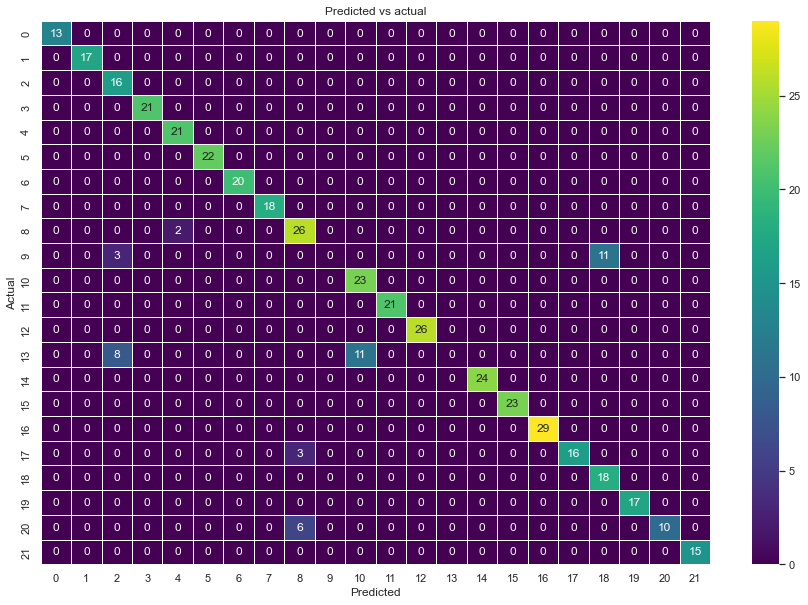

In [88]:
y_pred = DT.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

## 3. Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [90]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


In [91]:
#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.990909090909091


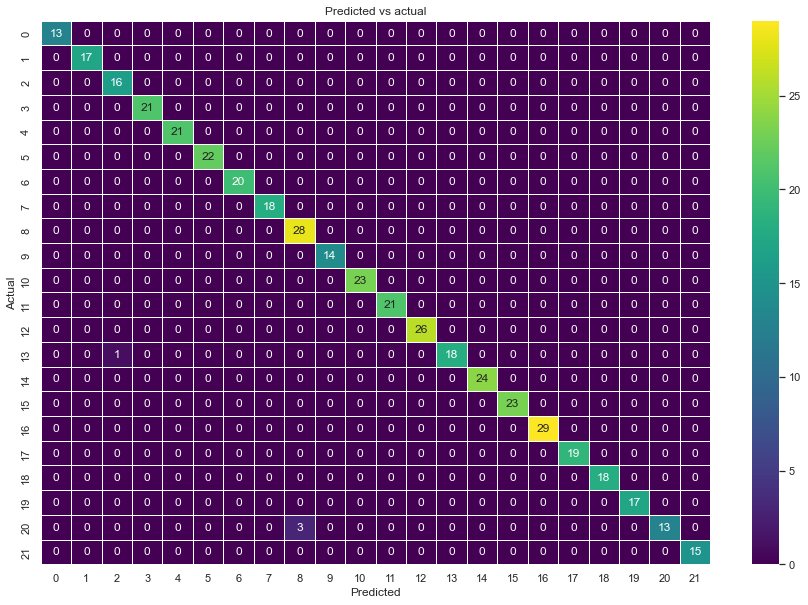

In [92]:
y_pred = RF.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

## 4. Naive Bayes Classifier

In [93]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00    

In [94]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [95]:
#Print Train Accuracy
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Training accuracy = ",NaiveBayes.score(x_train,y_train))
#Print Test Accuracy
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(x_test,y_test))

Training accuracy =  0.9960227272727272
Testing accuracy =  0.990909090909091


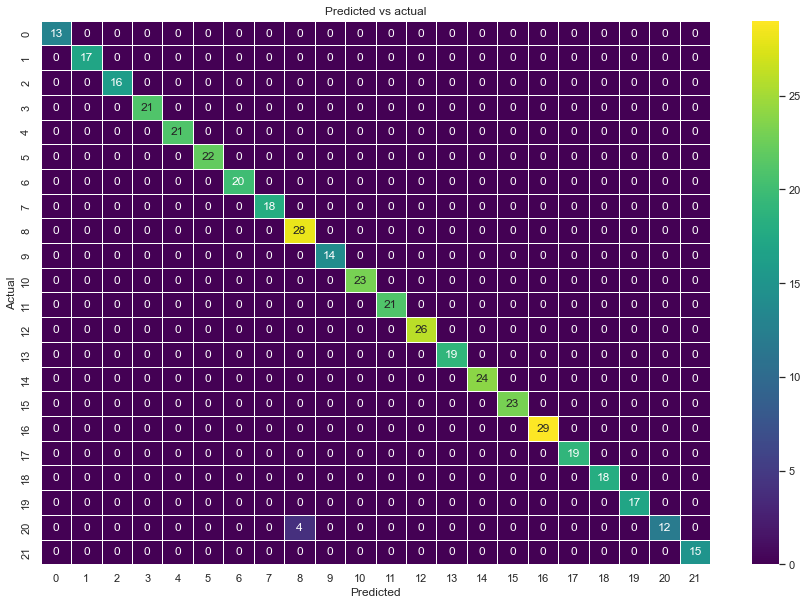

In [96]:
y_pred = NaiveBayes.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

# Accuract comparison

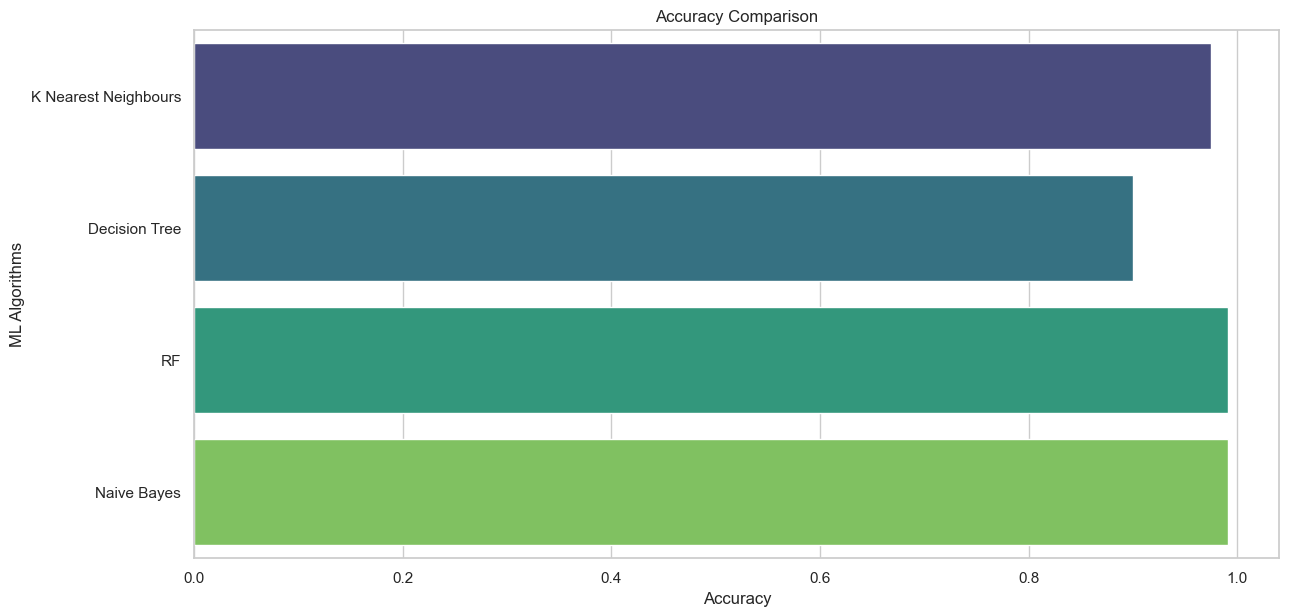

In [98]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

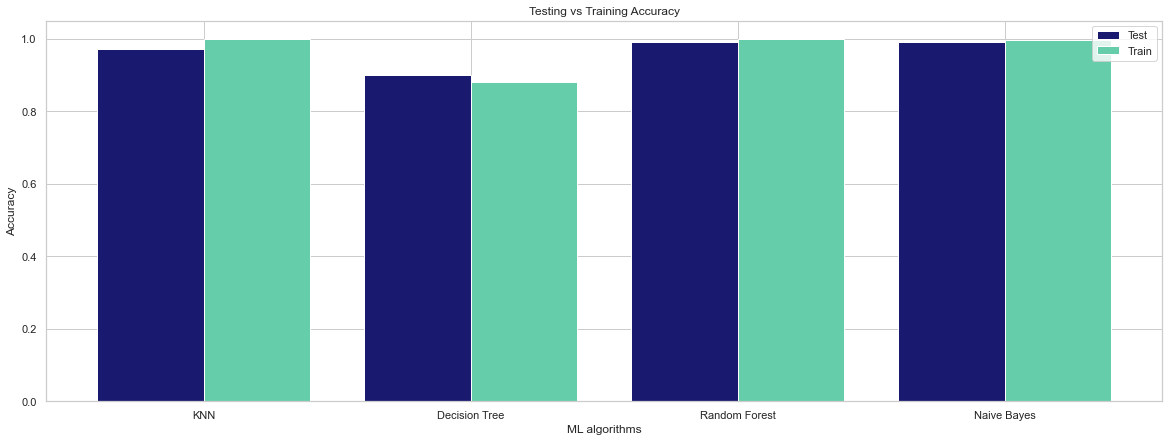

In [100]:
label = ['KNN', 'Decision Tree','Random Forest','Naive Bayes']
Test = [knn_test_accuracy, dt_test_accuracy,rf_test_accuracy,
        nb_test_accuracy]
Train = [knn_train_accuracy,  dt_train_accuracy, rf_train_accuracy,
         nb_train_accuracy]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()

# Data Cleaning

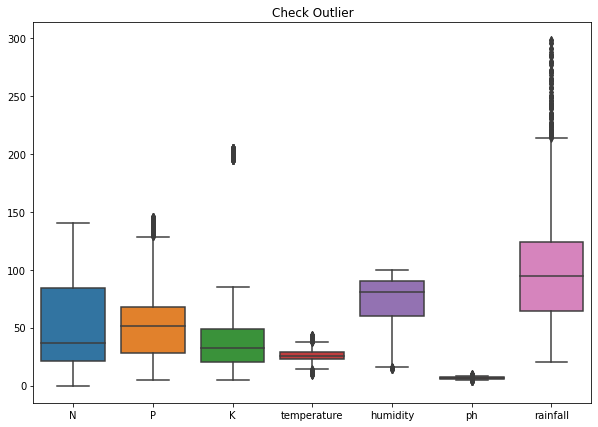

In [ ]:
#Check outlier data dengan visualisasi boxplot
plt.subplots(figsize=(10,7))
sns.boxplot(data=crop).set_title("Check Outlier")
plt.show()

In [ ]:
#Define fungsi untuk check outlier
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

#Define fungsi untuk remove outlier
def remove_outliers(df, x):
    return df.drop((detect_outliers(df, x)).index, axis=0)

In [ ]:
print("Ukuran df sebelum: %d baris, %d kolom." % crop.shape)

Ukuran df sebelum: 2200 baris, 8 kolom.


<AxesSubplot:xlabel='P'>

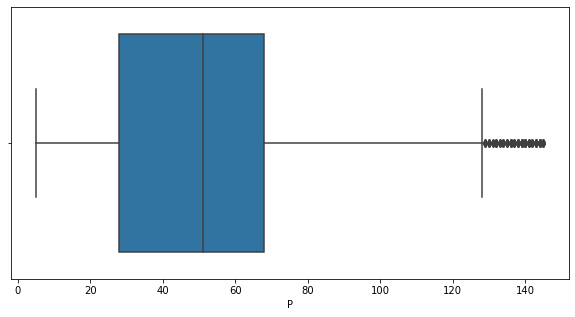

In [ ]:
#Visualisasi boxplot kolom P
plt.figure(figsize =(10, 5))
sns.boxplot(crop['P'])

<AxesSubplot:xlabel='K'>

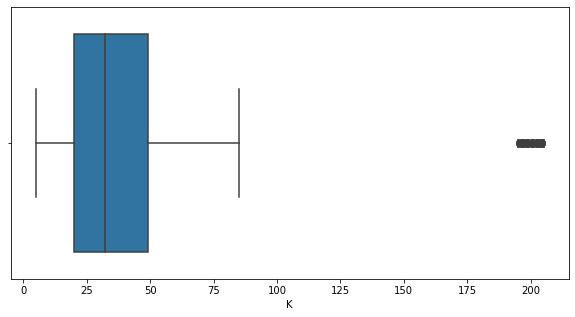

In [ ]:
#Visualisasi boxplot kolom K
plt.figure(figsize =(10, 5))
sns.boxplot(crop['K'])

<AxesSubplot:xlabel='rainfall'>

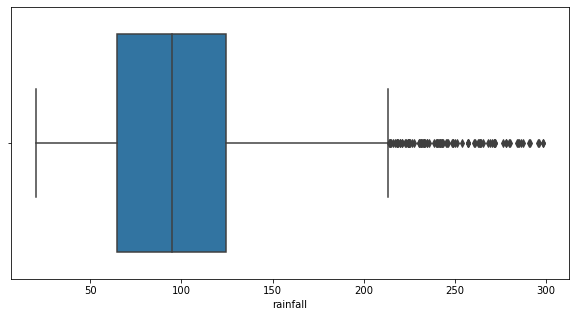

In [ ]:
#Visualisasi boxplot kolom rainfall
plt.figure(figsize =(10, 5))
sns.boxplot(crop['rainfall'])

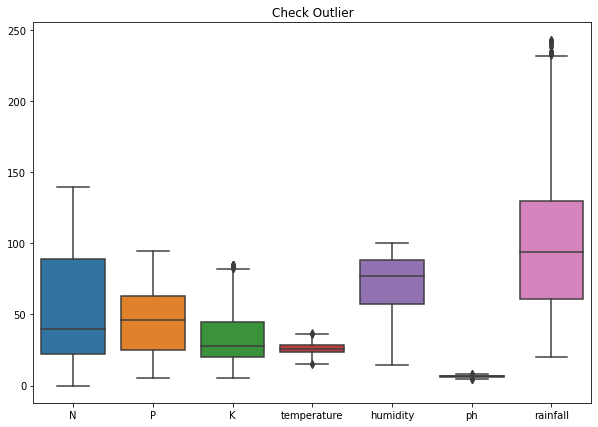

In [ ]:
#Menghilangkan data outlier kolom P
crop=remove_outliers(crop,"P")

#Menghilangkan data outlier kolom K
crop=remove_outliers(crop,"K")

#Menghilangkan data outlier kolom rainfall
crop=remove_outliers(crop,"rainfall")

#Menghilangkan data outlier kolom temperature
crop=remove_outliers(crop,"temperature")

#Menghilangkan data outlier kolom ph
crop=remove_outliers(crop,"ph")

#Check outlier data dengan visualisasi boxplot
plt.subplots(figsize=(10,7))
sns.boxplot(data=crop).set_title("Check Outlier")
plt.show()

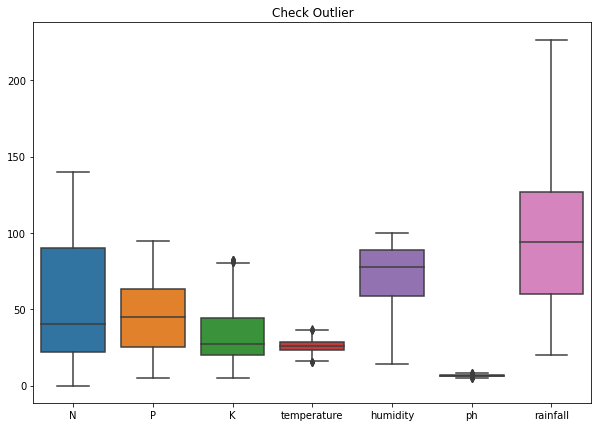

In [ ]:
#Menghilangkan data outlier kolom K
crop=remove_outliers(crop,"K")

#Menghilangkan data outlier kolom rainfall
crop=remove_outliers(crop,"rainfall")
crop=remove_outliers(crop,"rainfall")
crop=remove_outliers(crop,"rainfall")
crop=remove_outliers(crop,"rainfall")

#Check outlier data dengan visualisasi boxplot
plt.subplots(figsize=(10,7))
sns.boxplot(data=crop).set_title("Check Outlier")
plt.show()

In [ ]:
#Hitung ukuran (jumlah baris dan kolom) dari dataset
print("Ukuran df sekarang: %d baris, %d kolom." % crop.shape)

Ukuran df sekarang: 1785 baris, 8 kolom.


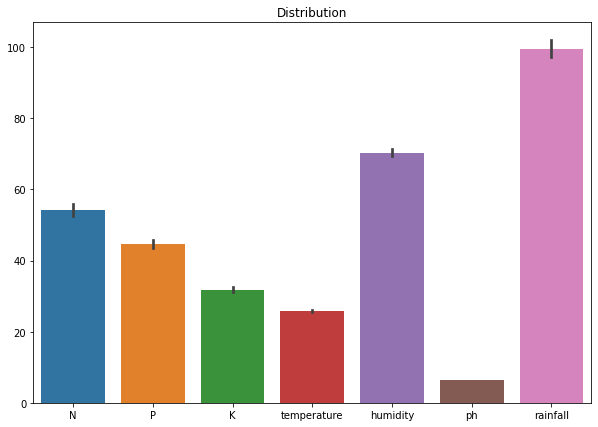

In [ ]:
#Viasualisasi Barplot
plt.subplots(figsize=(10,7))
sns.barplot(data=crop).set_title("Distribution")
plt.show()

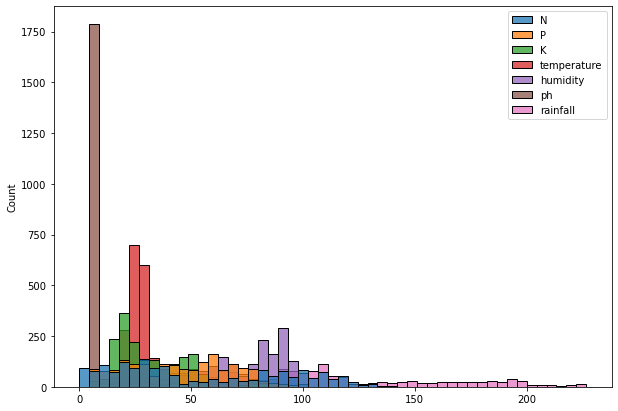

In [ ]:
#Visualisasi Histogram
plt.subplots(figsize=(10,7))
sns.histplot(data=crop)
plt.show()

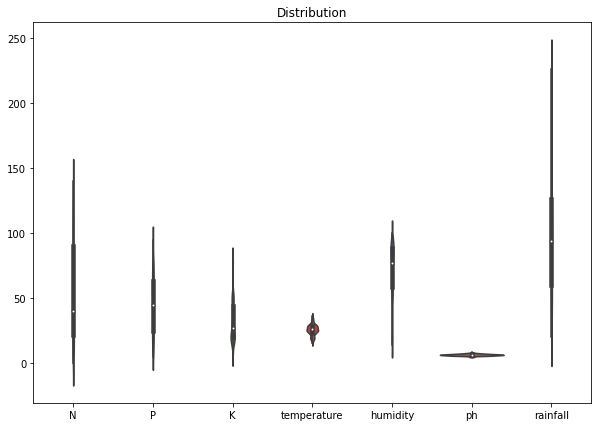

In [ ]:
#Visualisasi boxplot
plt.subplots(figsize=(10,7))
sns.violinplot(data=crop).set_title("Distribution")
plt.show()

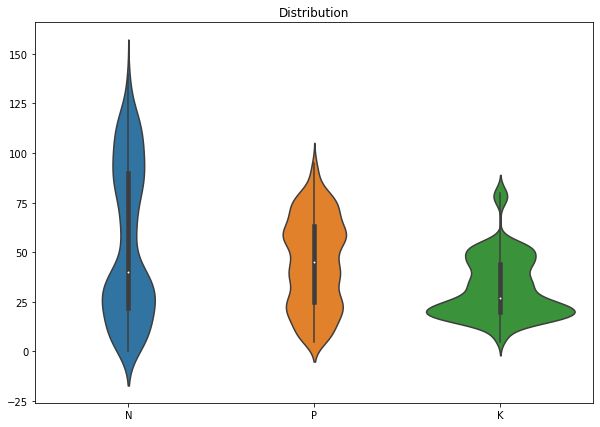

In [ ]:
#Visualisasi violinplot untuk kolom N, P, K
plt.subplots(figsize=(10,7))
sns.violinplot(data=crop[["N","P","K"]]).set_title("Distribution")
plt.show()

Text(0.5, 1.0, 'Rainfall')

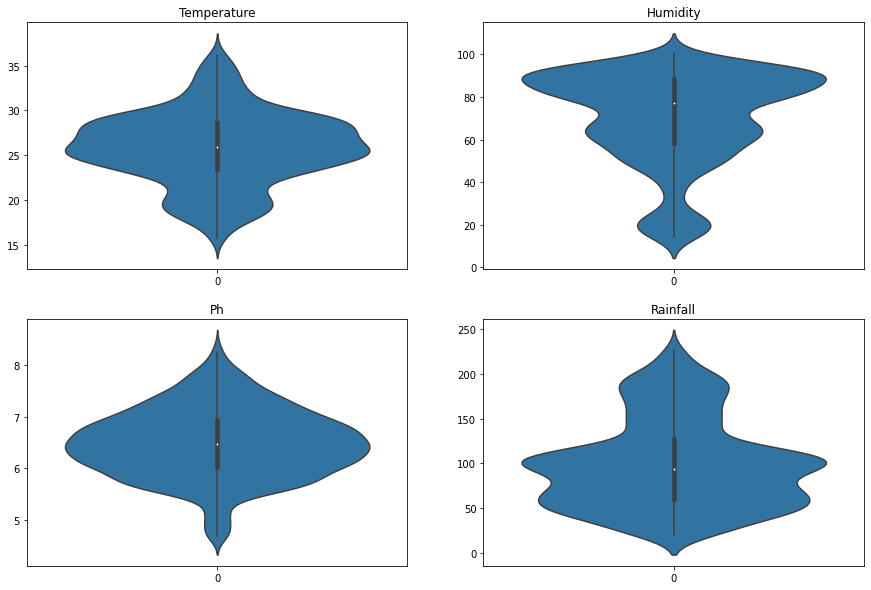

In [ ]:
#Visualisasi violinplot untuk kolom temperature, humidity, Ph, Rainfall
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(data=crop["temperature"]).set_title("Temperature")
plt.subplot(2,2,2)
sns.violinplot(data=crop["humidity"]).set_title("Humidity")
plt.subplot(2,2,3)
sns.violinplot(data=crop["ph"]).set_title("Ph")
plt.subplot(2,2,4)
sns.violinplot(data=crop["rainfall"]).set_title("Rainfall")

In [ ]:
#Melakukan describe data
crop.describe(include="all")

,N,P,K,temperature,humidity,ph,rainfall,label
count,1785.00000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jute
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,54.27451,44.655462,31.849300,25.808975,70.309248,6.488060,99.524823,NaN
std,38.35794,22.616280,15.587962,4.100476,21.994252,0.671278,50.047544,NaN
min,0.00000,5.000000,5.000000,15.330426,14.258040,4.626212,20.211267,NaN
25%,22.00000,25.000000,20.000000,23.426116,58.525343,6.030447,59.844992,NaN
50%,40.00000,45.000000,27.000000,25.937302,77.342640,6.461619,94.002872,NaN
75%,90.00000,63.000000,44.000000,28.559810,88.483126,6.932537,126.673812,NaN


Text(0.5, 1.0, 'General Statistics of Iris Dataset')

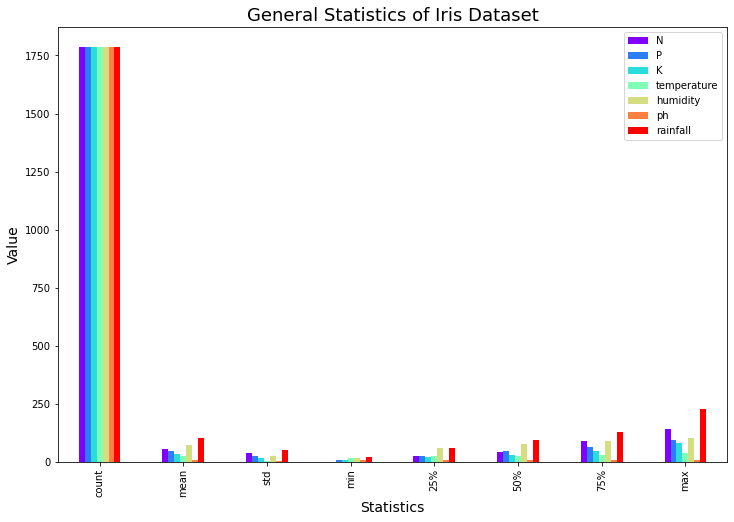

In [ ]:
#Visualisasi describe
crop.describe().plot(kind = "bar", figsize = (12,8), colormap = "rainbow")
plt.xlabel('Statistics',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.title("General Statistics of Iris Dataset",fontsize=18)

In [ ]:
#Check correlation
crop.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.078808,0.335052,-0.023279,0.256775,0.083841,-0.028949
P,-0.078808,1.000000,-0.051126,-0.082366,-0.476549,0.014521,-0.044729
K,0.335052,-0.051126,1.000000,-0.097396,0.045507,0.001906,-0.013604
temperature,-0.023279,-0.082366,-0.097396,1.000000,0.265825,-0.020859,-0.092427
humidity,0.256775,-0.476549,0.045507,0.265825,1.000000,0.108981,0.007112
ph,0.083841,0.014521,0.001906,-0.020859,0.108981,1.000000,-0.164274
rainfall,-0.028949,-0.044729,-0.013604,-0.092427,0.007112,-0.164274,1.000000


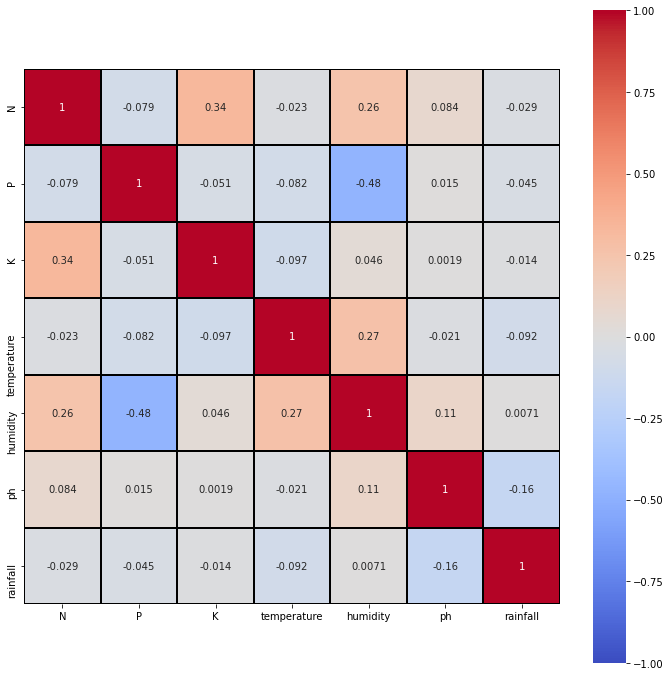

In [ ]:
# lihat visualisasi korelasi dengan heatmap
fig=plt.gcf()
fig.set_size_inches(12,12)
fig=sns.heatmap(crop.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

# Deploy Model

In [ ]:
import pickle

pickle.dump(logreg, open('crop_pred.pkl','wb'))